### Python String Manipulation and Regular Expression

In [1]:
import json

In [2]:
indeed = json.load(open("../data/job_descriptions/indeed_job_descs_data+scientist.json",
                        "r"))

In [3]:
jd_demo = indeed['job_descriptions'][0]
"Python" in jd_demo

True

In [4]:
"python" in jd_demo

False

In [5]:
"python" in jd_demo.lower()

True

In [6]:
import re

In [7]:
re.findall('.{20}python.{20}', jd_demo.lower())

[' of experience with python programming languag']

In [8]:
re.findall('.{20}R.{20}', jd_demo)

['nts in Asia Pacific Regions, Australia et',
 'esentations to the CRO and to Credit Risk',
 'orm at a high level.Responsibilities and ',
 'anceVision insuranceRetirement planProfes']

In [9]:
re.findall('.{0,20}R.{0,20}', indeed['job_descriptions'][2])

['ABOUT HOPPER',
 'Recognized as the fas',
 'THE ROLE',
 'IN THIS ROLE, YOU WILL:',
 'perience in Pandas, R, SAS or other tools',
 's to a 401k (US) or Retirement Savings Pl']

In [10]:
re.findall('.{0,20}[^\w]R[^\w].{0,20}', indeed['job_descriptions'][2])

['xperience in Pandas, R, SAS or other tools ']

In [11]:
results_r = []
results_python = []

for jd in indeed['job_descriptions']:
    mentions_python = 'python' in jd.lower()
    mentions_r = re.findall('.{0,20}[^\w]R[^\w].{0,20}', jd)
    results_r.append(True if mentions_r else False)
    results_python.append(True if mentions_python else False)

In [12]:
sum(results_r)

46

In [13]:
sum(results_python)

61

### Preprocessing text

In [14]:
from nltk.tokenize import word_tokenize
word_tokenize("Dr. Watson wouldn't agree.")

['Dr.', 'Watson', 'would', "n't", 'agree', '.']

In [15]:
from nltk.tokenize import TweetTokenizer
tweet = "We need a translation from @JColtonCosplay #STAT."

word_tokenize(tweet)

['We',
 'need',
 'a',
 'translation',
 'from',
 '@',
 'JColtonCosplay',
 '#',
 'STAT',
 '.']

In [16]:
tokenizer = TweetTokenizer()
tokenizer.tokenize(tweet)

['We', 'need', 'a', 'translation', 'from', '@JColtonCosplay', '#STAT', '.']

In [17]:
tokens = word_tokenize("R is awesome")
"R" in tokens

True

In [18]:
jds = indeed['job_descriptions']
tokens = word_tokenize(jds[2])

In [19]:
'bit.ly/2q6U8dq' in tokens

True

In [20]:
'bit.ly' in tokens

False

In [21]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

stemmer = PorterStemmer()
stemmer.stem("Developing")

'develop'

In [22]:
stemmer.stem("developed")

'develop'

In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
lemmatizer.lemmatize("is", pos="v")

'be'

In [25]:
lemmatizer.lemmatize("are", pos="v")

'be'

In [26]:
lemmatizer.lemmatize("cats")

'cat'

In [27]:
lemmatizer.lemmatize("Is", pos="v")

'Is'

In [28]:
stemmer.stem('data')

'data'

In [29]:
stemmer.stem('datum')

'datum'

In [30]:
from collections import Counter
tokens = word_tokenize(jds[2])
stemmed_tokens = [stemmer.stem(token) for token in tokens]
token_cnt = Counter(stemmed_tokens)

In [31]:
len(token_cnt)

303

In [32]:
len(set(tokens))

335

In [33]:
from nltk.corpus import stopwords
en_sw = set(stopwords.words('english'))

tokens = word_tokenize(jds[2].lower())
stemmed_tokens = [stemmer.stem(token)
                  for token in tokens
                  if token not in en_sw]
token_cnt = Counter(stemmed_tokens)

In [34]:
len(token_cnt)

255

### Bag of Words

In [35]:
import pandas as pd

In [36]:
# Building things from scratch before using scikit-learn

In [37]:
tok_cnts = []
for jd in indeed["job_descriptions"]:
    tokens = word_tokenize(jd.lower())
    tokens = [stemmer.stem(token) for token in tokens if token not in en_sw]
    tok_cnts.append(Counter(tokens))

bow = pd.DataFrame(tok_cnts)

In [38]:
bow.fillna(value=0, inplace=True)

In [39]:
bow.shape

(79, 3205)

In [40]:
# Use scikit-learn with no inputs

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer()
bow_skl = vectorizer.fit_transform(indeed['job_descriptions'])

tokens_skl = vectorizer.get_feature_names()
freq_skl = bow_skl.toarray()

In [43]:
freq_skl.shape

(79, 4169)

In [44]:
vectorizer = CountVectorizer(stop_words=en_sw, tokenizer=word_tokenize)
analyzer = vectorizer.build_analyzer()


def stem_analyzer(doc):
    return [stemmer.stem(w) for w in analyzer(doc)]


stem_vectorizer = CountVectorizer(analyzer=stem_analyzer)
bow_skl = stem_vectorizer.fit_transform(indeed["job_descriptions"])

tokens_skl = stem_vectorizer.get_feature_names()
freq_skl = bow_skl.toarray()

/anaconda3/envs/text-mine/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [45]:
freq_skl.shape

(79, 3205)

### TF-IDF

In [46]:
tf = bow.values
N = bow.shape[0]
idf_df = bow.apply(
  lambda x: pd.np.log(N / (1 + sum(x > 0))), axis=0)
# Manipulate the shape for broadcasting
idf = idf_df.values.reshape((1, -1))
tfidf = pd.DataFrame(tf * idf, columns=bow.columns)

In [47]:
tfidf.shape

(79, 3205)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=stem_analyzer)
tfidf_skl = tfidf_vectorizer.fit_transform(indeed['job_descriptions'])
tfidf_mat = tfidf_skl.toarray()
tokens = tfidf_vectorizer.get_feature_names()

In [49]:
tfidf_mat.shape

(79, 3205)

In [50]:
pd.np.max(tfidf_mat)

0.9197251605044925

In [51]:
pd.np.max(tfidf)

biz2credit            35.979191
(                      3.148743
read                   2.577688
www.biz2credit.com     3.270836
)                      3.148743
                        ...    
forgiv                 3.676301
arrest                 3.676301
e-mail                 3.676301
benefits.hrdept        3.676301
aclu.org               3.676301
Length: 3205, dtype: float64

In [52]:
tf = bow.values
N = bow.shape[0]
idf_df = bow.apply(
  lambda x: pd.np.log((N + 1) / (1 + sum(x > 0))) + 1, axis=0)
# Manipulate the shape for broadcasting
idf = idf_df.values.reshape((1, -1))
tfidf = pd.DataFrame(tf * idf, columns=bow.columns)
norm_const = tfidf.apply(lambda x: 1 / pd.np.sqrt(sum(x**2)), axis=1)
tfidf_norm = tfidf * norm_const.values.reshape((-1, 1))

In [53]:
tfidf_norm.sort_index(axis=1, inplace=True)

In [54]:
pd.np.max(tfidf_norm - tfidf_mat)

!         6.938894e-17
#         2.775558e-17
$         1.665335e-16
%         8.326673e-17
&         1.387779e-16
              ...     
”         2.775558e-17
…         0.000000e+00
ﬁeld      0.000000e+00
ﬁnd       0.000000e+00
ﬁnding    0.000000e+00
Length: 3205, dtype: float64

In [55]:
# Apply on the larger dataset
indeed = json.load(
    open("../data/job_descriptions/indeed_jds_by_doc.json", "r"))
tfidf_skl = tfidf_vectorizer.fit_transform(indeed['job_descriptions'])
tfidf_mat = tfidf_skl.toarray()
tokens = tfidf_vectorizer.get_feature_names()

In [56]:
tfidf_mat.shape

(2107, 22166)

In [57]:
tfidf_df = pd.DataFrame(tfidf_mat, columns=tokens)
avg_tfidf = tfidf_df.apply(pd.np.mean, 0)

In [58]:
top_tokens = avg_tfidf.sort_values(ascending=False)[:200].index
top_tfidf = tfidf_df[top_tokens]

### t-SNE

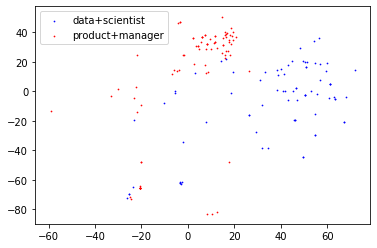

In [59]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

red_tfidf = TSNE(n_components=2).fit_transform(top_tfidf)

colors = ['red', 'blue']
subplots = []
titles = []
job_titles = ['data+scientist', 'product+manager']
for title in job_titles:
    subset = [label == title for label in indeed['labels']]
    subplots.append(
      plt.scatter(red_tfidf[subset, 0],
                  red_tfidf[subset, 1],
                  color=colors.pop(),
                  s=0.5))
    titles.append(title)
    plt.legend([subplot for subplot in subplots],
               titles)

# Save the different methods into different plots
plt.show()
